# Final project: Prediction of US Mortgage Interest Rates

### The scope of the research

During 2007-2008, United States went through multinational financial crisis as a result of subprime mortgage crisis, which damaged international financial systems and economies. The collapse of a housing bubble (massive credit crisis on mortgages) led to [mortgage delinquencies, foreclosures, and the devaluation of housing-related securities](https://en.wikipedia.org/wiki/Subprime_mortgage_crisis). This showed the importance of housing market and its strong effect on financial and broader economic systems of the world.

Today, banks use numerous factors when estimating the mortgage deals, which in the banking world is referred as scoring. Scoring allows to analyze credit-worthiness and risk profile of customers using scoring models. According to [Federal Deposit Insurance Corporation](https://www.fdic.gov/regulations/examinations/credit_card/pdf_version/ch8.pdf), "scoring models summarize available, relevant information about consumers and reduce the information into a set of ordered categories (scores) that foretell an outcome." One of the ways of implementing scoring is calculation of mortgage interest rates that accurately reflects borrower's ability to repay a mortgage, and adjusts for the risks that comes with mortgage loans.  

Therefore, in this project, I'm attempting to deploy models that would predict accurate mortgage interest rates based on the characteristics of borrowers. 

### Data

Freddie Mac - government-sponsored financial company that buys mortgages from banks to promote stability and affortability in the housing market - provides datasets on housing market for research purposes. They publish loan-level credit performance data on all mortgages that the company purchased or guaranteed from 1999 to this year.

The best way to conduct this research is undoubtedly to include all the data from all the years available. With more data, the predictive models produce better results, as there is more data to "learn" from, and control for year fixed-effects (such as time-series). However, due to limited capabilities of the computer, I am going to use dataset sample only for one year, which is 2018. The year of 2018 was chosen because it is not strongly affected by the crisis in 2008 and COVID pandemic in 2020.   

#### Dataset: Single-Family Loan-Level Dataset Sample for 2018
Source: https://www.freddiemac.com/research/datasets/sf-loanlevel-dataset

The dataset contains 50000 rows.

## Data cleaning

Originally, the dataset contains 31 columns. However, some of the columns contain information which are only available after the loan deal is approved. For example, when applying for loan, the information on prepayment penalty (fee for paying the mortgage loan off early) is not available, as it is calculated only after the loan is done. As we are trying to predict mortgage interest rates before the mortgage deal is done, we will need to remove such columns. 

Also, the dataset contains missing/NaN values which need to be inspected.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ["Credit_Score","First_Payment_Date","First_Time_Homebuyer", "Maturity_Date",
"MSA","Mortgage_Insurance_Percentage","Number_Units","Occupancy_Status","CLTV",
"DTI","UPB","LTV","Interest_Rate","Channel","Prepayment_Penalty",
"Amortization_Type","State","Property_Type","Postal_Code","Sequence_Number",
"Purpose","Loan_Term","Number_Borrowers","Seller_Name","Servicer_Name",
"Super_Conforming","PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER","Program_Indicator","Relief_Refinance_Indicator",
"Valuation_Method","Interest_Only"]

loans = pd.read_csv("Data/sample_orig_2018.txt", sep="|", names=col_names)

In [3]:
loans

,Credit_Score,First_Payment_Date,First_Time_Homebuyer,Maturity_Date,MSA,Mortgage_Insurance_Percentage,Number_Units,Occupancy_Status,CLTV,DTI,...,Loan_Term,Number_Borrowers,Seller_Name,Servicer_Name,Super_Conforming,PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER,Program_Indicator,Relief_Refinance_Indicator,Valuation_Method,Interest_Only
0,654,201803,N,204802,NaN,0,1,P,77,35,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1,693,201803,N,203302,24340.0,0,1,P,80,41,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
2,757,201803,Y,204802,NaN,25,1,P,97,10,...,360,1,Other sellers,Other servicers,NaN,NaN,H,NaN,2,N
3,807,201803,N,203302,NaN,0,1,P,26,38,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
4,812,201803,N,203302,19340.0,0,1,P,14,14,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,756,202007,N,204912,NaN,0,1,S,51,50,...,354,4,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
49996,779,202010,N,205009,NaN,0,1,P,72,26,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
49997,756,202011,N,204908,16300.0,0,1,P,76,32,...,346,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
49998,713,202010,N,205009,49420.0,0,1,P,80,43,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Credit_Score                               50000 non-null  int64  
 1   First_Payment_Date                         50000 non-null  int64  
 2   First_Time_Homebuyer                       50000 non-null  object 
 3   Maturity_Date                              50000 non-null  int64  
 4   MSA                                        45063 non-null  float64
 5   Mortgage_Insurance_Percentage              50000 non-null  int64  
 6   Number_Units                               50000 non-null  int64  
 7   Occupancy_Status                           50000 non-null  object 
 8   CLTV                                       50000 non-null  int64  
 9   DTI                                        50000 non-null  int64  
 10  UPB                   

### Dropping irrelevant variables
The dataset contains information that are unavailable when applying for a loan. Therefore, we are going to drop those columns. 
These are the columns that are going to be dropped:
- FIRST PAYMENT DATE
- MATURITY DATE
- MORTGAGE INSURANCE PERCENTAGE (MI %)
- ORIGINAL UNPAID PRINCIPLE BALANCE
- SELLER NAME and SERVICE NAME 
- SUPER CONFORMING
- Prepayment Penalty

Additionally, we are going to drop the following columns:
- METROPOLITAN STATISTICAL AREA: this information is already encoded in "State" column. 
- POSTAL CODE: we already have "State" column, so this variable is not needed.
- LOAN SEQUENCE NUMBER: Unique identifier assigned to each loan. It adds no valuable information, therefore we also drop it. 
- PROPERTY VALUATION METHOD: knowing which method was used to obtain a property appraisal does not affect the interest rates.
- PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER: Sequence number of a pre-relief loans provides no information for us. 
- Amortization_Type: Denotes that the product is a fixed-rate mortgage or adjustable-rate mortgage. It has no effect in determining the interest rate of mortgages. 

In [5]:
cols_drop = ["First_Payment_Date", "Maturity_Date", "Mortgage_Insurance_Percentage",
             "UPB", "Seller_Name", "Servicer_Name", "Amortization_Type",
             "Super_Conforming", 'Prepayment_Penalty', "MSA", "Postal_Code", 
             "Sequence_Number", "Valuation_Method", "PRE-RELIEF REFINANCE LOAN SEQUENCE NUMBER"]

loans = loans.drop(columns=cols_drop)

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_Score                50000 non-null  int64  
 1   First_Time_Homebuyer        50000 non-null  object 
 2   Number_Units                50000 non-null  int64  
 3   Occupancy_Status            50000 non-null  object 
 4   CLTV                        50000 non-null  int64  
 5   DTI                         50000 non-null  int64  
 6   LTV                         50000 non-null  int64  
 7   Interest_Rate               50000 non-null  float64
 8   Channel                     50000 non-null  object 
 9   State                       50000 non-null  object 
 10  Property_Type               50000 non-null  object 
 11  Purpose                     50000 non-null  object 
 12  Loan_Term                   50000 non-null  int64  
 13  Number_Borrowers            500

### Missing/NaN values
Freddie Mac provides [dataset user guide](https://www.freddiemac.com/fmac-resources/research/pdf/user_guide.pdf), where we can see the values used as a mask for null values for each column, and we are going to use them to convert to NaN values.

The definitions for the variables can be also found in that pdf file. 

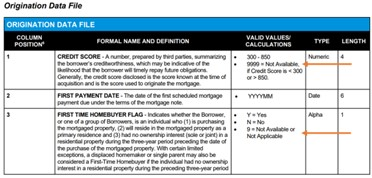

In [7]:
# Creating list of columns to clean from null values and list of those null values corresponding to each column

columns = loans.columns.to_list()
remove = {'Interest_Rate', 'State', 'Loan_Term', 
            'Relief_Refinance_Indicator', 'Interest_Only'} # these variables do not have null values
columns = [x for x in columns if x not in remove]
null_vals = [9999, '9', 99, '9', 999, 999, 999, '9', '99', '9', 99, '9']

# Checking that the lengths of the two lists match

print({len(columns)} == {len(null_vals)})

True


In [8]:
# matching column names with their corresponding null values

dict_null_vals = {columns[i]: null_vals[i] for i in range(len(columns))}
print(dict_null_vals)

{'Credit_Score': 9999, 'First_Time_Homebuyer': '9', 'Number_Units': 99, 'Occupancy_Status': '9', 'CLTV': 999, 'DTI': 999, 'LTV': 999, 'Channel': '9', 'Property_Type': '99', 'Purpose': '9', 'Number_Borrowers': 99, 'Program_Indicator': '9'}


In [9]:
# converting null values to NaN values 

for key in dict_null_vals: 
    loans[key].replace(dict_null_vals[key], np.nan, inplace=True)

In [10]:
loans.isnull().sum()

Credit_Score                     17
First_Time_Homebuyer              0
Number_Units                      0
Occupancy_Status                  0
CLTV                              2
DTI                             522
LTV                               1
Interest_Rate                     0
Channel                           0
State                             0
Property_Type                     0
Purpose                           0
Loan_Term                         0
Number_Borrowers                  0
Program_Indicator             44237
Relief_Refinance_Indicator    49479
Interest_Only                     0
dtype: int64

According to the user guide: 
* Blank values of *Relief_Refinance_Indicator* mean that the loans are not part of Relief Refinance Loan, while those that are a part of the program are labelled as 'Y' (Yes). This means that we have strongly unbalanced data for Relief Refinance Loans and Non Relief Refinance Loans. Therefore, it is better to drop this column as it adds very little variance to the data. 
* *DTI* Ratios of loans in the Home Affordable Refinance Program (HARP) are disclosed as not available as "this disclosure is subject to the widely varying standards originators use to verify Borrowers’ assets and liabilities". That means the dataset contains 522 HARP loans, and we don't know their DTI ratios. Note that these 522 loans are the loans labelled as part of Relief Refinance Loan in the *Relief_Refinance_Indicator* column. As these NaN values comprise only small proportion of the whole dataset, they will be filled with the median values.  
* The null values of *Program_Indicator* suggest that the loan is either not part of any Freddie Mac programs or data is not available, meaning that we have 44237 loans which we don't know if they separate from Freddie Mac's programs or just missing values. Therefore, this column will be dropped, as it gives no helpful information for us. 
* For *CLTV*, *LTV* and *Credit_Score*, Freddie Mac masks extreme outliers or loans related HARP as not available. As these NaN values comprise only small proportion of the whole dataset, they will be filled with the median.  

In [11]:
# Dropping Program Indicator and Relief Refinance Indicator columns

loans.drop(columns=['Program_Indicator', 'Relief_Refinance_Indicator'], inplace=True)

# Filling null values in the columns with mean values 
loans[['CLTV', 'LTV', 'Credit_Score', 'DTI']] = loans[['CLTV', 'LTV', 'Credit_Score', 'DTI']].fillna(loans[['CLTV', 'LTV', 'Credit_Score', 'DTI']].median())

In [12]:
loans.isnull().any()

Credit_Score            False
First_Time_Homebuyer    False
Number_Units            False
Occupancy_Status        False
CLTV                    False
DTI                     False
LTV                     False
Interest_Rate           False
Channel                 False
State                   False
Property_Type           False
Purpose                 False
Loan_Term               False
Number_Borrowers        False
Interest_Only           False
dtype: bool

### Definitions of the variables used in this dataset
1. CREDIT SCORE - A number, prepared by third parties, summarizing the borrower’s creditworthines.
2. FIRST TIME HOMEBUYER FLAG - Indicates whether the Borrower, or one of a group of Borrowers, is an individual who (1) is purchasing the mortgaged property, (2) will reside in the mortgaged property as a primary residence and (3) had no ownership interest (sole or joint) in a residential property during the three-year period preceding the date of the purchase of the mortgaged property.
3. NUMBER OF UNITS - Denotes whether the mortgage is a one-, two-, three-, or four-unit property.
4. OCCUPANCY STATUS - Denotes whether the mortgage type is owner occupied, second home, or investment property.
5. COMBINED LOAN-TO-VALUE (CLTV) – In the case of a purchase mortgage loan, the ratio is obtained by dividing the original mortgage loan amount plus any secondary mortgage loan amount disclosed by the Seller by the mortgaged property’s appraised value on the note date or its purchase price.
6. DEBT-TO-INCOME (DTI) RATIO - Disclosure of the debt to income ratio is based on the sum of the borrower's monthly debt payments, including monthly housing expenses that incorporate the mortgage payment the borrower is making at the time of the delivery of the mortgage loan to Freddie Mac, divided by the total monthly income used to underwrite the loan as of the date of the origination of the such loan. 
7. LOAN-TO-VALUE (LTV) - In the case of a purchase mortgage loan, the ratio obtained by dividing the original mortgage loan amount by the mortgaged property’s appraised value on the note date or its purchase price. Difference from CLTV is that LTV does not include any secondary mortgage loans.
8. INTEREST RATE - The original note rate as indicated on the mortgage note. 
9. CHANNEL - Disclosure indicates whether a Broker or Correspondent, as those terms are defined below, originated or was involved in the origination of the mortgage loan.
10. STATE - A two-letter abbreviation indicating the state or territory within which the property securing the mortgage is located.
11. PROPERTY TYPE - Denotes whether the property type secured by the mortgage is a condominium, leasehold, planned unit development (PUD), cooperative share, manufactured home, or Single-Family home.
12. (LOAN) PURPOSE - Indicates whether the mortgage loan is a Cashout Refinance mortgage, No Cash-out Refinance mortgage, or a Purchase mortgage.
13. LOAN TERM - A calculation of the number of scheduled monthly payments of the mortgage.
14. NUMBER OF BORROWERS - The number of Borrower(s) who are obligated to repay the mortgage note secured by the mortgaged property. 
15. INTEREST ONLY INDICATOR (I/O INDICATOR) - The indicator denoting whether the loan only requires interest payments for a specified period beginning with the first payment date.

The definitions are taken from the dataset user guide. For more detailed information, [click here](https://www.freddiemac.com/fmac-resources/research/pdf/user_guide.pdf).

## Exploratort Data Analysis

#### Target variable: Mortgage Interest Rates

In [13]:
print(loans['Interest_Rate'].describe())

count    50000.000000
mean         4.738207
std          0.474547
min          2.625000
25%          4.500000
50%          4.750000
75%          5.000000
max          6.625000
Name: Interest_Rate, dtype: float64


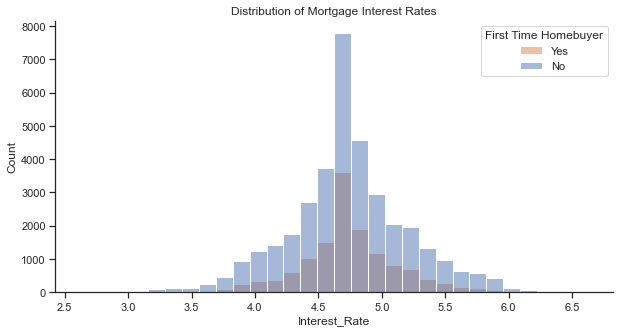

In [14]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.figsize": (10,5)}
sns.set_theme(style="ticks", rc=custom_params)
#plt.rcParams["figure.figsize"] = (20,3)
sns.histplot(data=loans, x='Interest_Rate', bins=30, hue='First_Time_Homebuyer')
plt.title('Distribution of Mortgage Interest Rates')
plt.legend(title='First Time Homebuyer', labels=['Yes', 'No'])

plt.show()

Interest rate values are relatively normally distributed, with a mean of 4.74%. The minimum and maximum interest rate values are 2.63% and 6.63% respectively. Extreme outliers are not observed. There is no distinction for first time vs not first time buyers in terms of interest rates (except for the imbalance of data). This means that First Time Homebuyers is a weak predictor of interest rates.  

#### Credit Scores

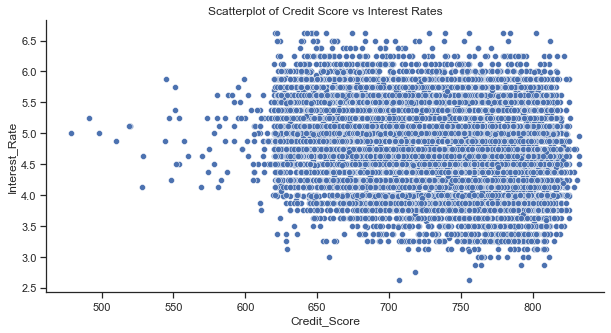

In [15]:
# Credit Scores
sns.scatterplot(data=loans, x='Credit_Score', y='Interest_Rate')
plt.title('Scatterplot of Credit Score vs Interest Rates')

plt.show()

Overall, we see that the majority of Credit Score values are between 630 and 850. The scatterplot suggests no obvious relationship between Credit Scores and Interest Rates. 

#### Number Units and Occupancy Status

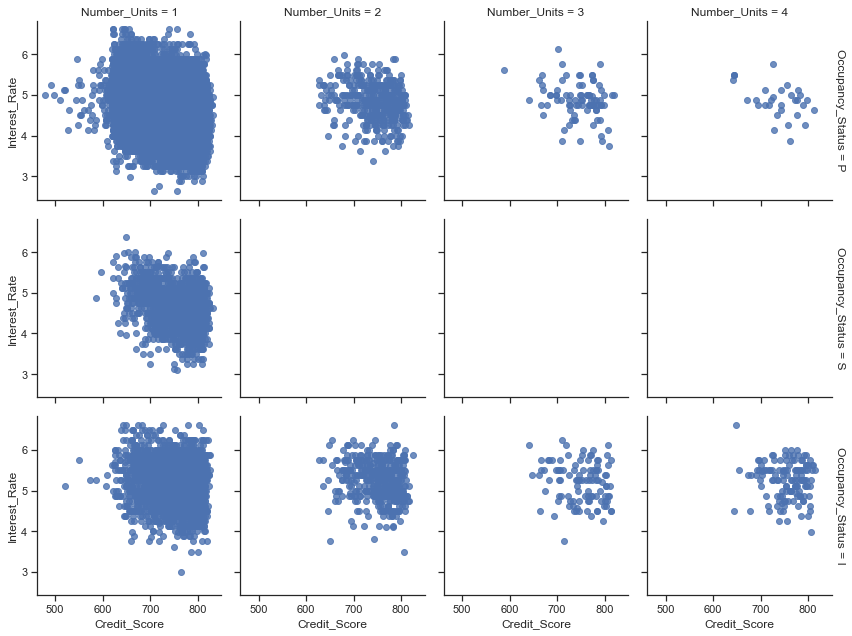

In [16]:
g = sns.FacetGrid(loans, row="Occupancy_Status", col="Number_Units", margin_titles=True)
g.map(sns.regplot, "Credit_Score", "Interest_Rate", fit_reg=False, x_jitter=.1)

plt.show()

Splitting the Credit Score vs Interest Rates scatterplot by Occupancy status and Number of Units shows no strong relationships, although in most of them (in the whole first row and first column), we can notice negative correlation between credit scores and interest rates. It is reasonable, as higher credit score means less risky profile of borrowers, leading to lower interest rate (less loan fee).

Note that the dataset does not contain mortgages that are second home with 2, 3 and 4 unit properties.

In [17]:
loans['Number_Units'].value_counts(normalize=True)

1    0.97576
2    0.01710
3    0.00388
4    0.00326
Name: Number_Units, dtype: float64

In [18]:
loans[['Interest_Rate', 'Number_Units']].groupby('Number_Units').mean()

,Interest_Rate
Number_Units,
1,4.730229
2,5.039050
3,5.049608
4,5.177454


Overall, we observe imbalance in the Number of Units. This is reasonable, since most mortgage loan borrowers look for relatively cheaper properties. The majority of Investment properties, primary residence and second homes are 1-unit properties. This is expected, as the dataset is comprised of 98% of single-unit houses.

When grouping by the number of units, we see that the average interest rate increases as the number of units of a property increases. But it does not show the clear picture, as there is a lack of data for 2,3 and 4 unit properties. 

#### Property types

In [19]:
loans['Property_Type'].value_counts()

SF    31184
PU    14131
CO     4352
MH      235
CP       98
Name: Property_Type, dtype: int64

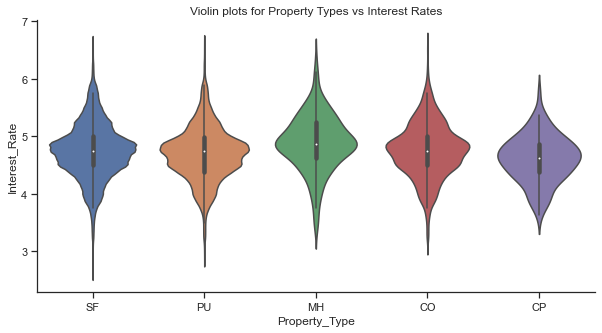

In [20]:
sns.violinplot(data=loans, y='Interest_Rate', x='Property_Type')
plt.title('Violin plots for Property Types vs Interest Rates')

plt.show()

The majority of property types given in the dataset is Single-Family homes, then comes Planned Unit Development and Condominium. There is little information on the mortgages of Manufactured Housings and Cooperative Share.

All property types' shape distributions are skinny on both ends and wide in the middle, indicating that interest rates are centered around the median. Notice that the median interest rate of Manufactured Housings are the highest, but overall, all the medians are quite similar (between 4.5% - 4.7%). These can suggest that the property type is a relatively weak predictor of interest rates, however it might be due to the lack of/imbalanced data.  

#### Number of borrowers

In [21]:
loans['Number_Borrowers'].value_counts()

1    26864
2    22712
3      376
4       47
5        1
Name: Number_Borrowers, dtype: int64

In [22]:
loans[['Interest_Rate', 'Number_Borrowers']].groupby('Number_Borrowers').describe()

Interest_Rate                                             \
                         count      mean       std    min      25%    50%   
Number_Borrowers                                                            
1                      26864.0  4.757483  0.470775  2.625  4.50000  4.750   
2                      22712.0  4.712133  0.478380  2.625  4.37500  4.750   
3                        376.0  4.922239  0.394598  3.750  4.71875  4.875   
4                         47.0  4.852979  0.495917  3.100  4.62500  4.875   
5                          1.0  4.500000       NaN  4.500  4.50000  4.500   

                                 
                     75%    max  
Number_Borrowers                 
1                 5.0000  6.625  
2                 5.0000  6.625  
3                 5.1250  6.250  
4                 5.0625  5.875  
5                 4.5000  4.500

Dominating majority of loans are borrowed by 1 and 2 borrowers. The interest rate for 3 and 4 borrowers is higher than for 1 and 2 borrowers. There is only one loan borrowed by 5 borrowers and its interest rate is 4.5%. 

It is expected to have less records for loans that have more than 3-4 co-borrowers, since the software that is used by Freddie Mac and Fannie Mae (government-backed company that buys out most of the single-family mortgages) are limited to process 4 borrowers. Also, in general, the practice shows that lenders tend to avoid having more than 2 borrowers. 

#### Interest Only Indicator & Prepayment Penalty Mortgage

In [23]:
loans['Interest_Only'].value_counts()

N    50000
Name: Interest_Only, dtype: int64

Interest Only indicator has no variance in the values: all the loans in the dataset are loans that only require interest payments for a specified period beginning with the first payment date. Since it adds no information, the variable will be dropped.

In [24]:
loans.drop(columns=['Interest_Only'], inplace=True)

#### Combined Loan-To-Value

In [25]:
loans['CLTV'].describe()

count    50000.000000
mean        76.382520
std         17.121794
min          5.000000
25%         70.000000
50%         80.000000
75%         90.000000
max        149.000000
Name: CLTV, dtype: float64

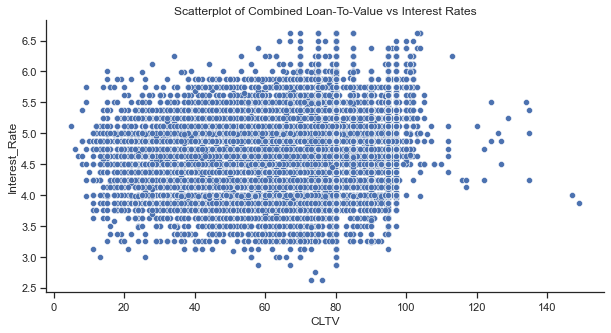

In [26]:
sns.scatterplot(data=loans, x='CLTV', y='Interest_Rate')
plt.title('Scatterplot of Combined Loan-To-Value vs Interest Rates')
plt.show()

The scatterplot suggests rare cases of mortgages when CLTV is higher than 100-110%. It is expected, as lenders tend to provide loans for borrowers with CLTV values less than [80%](https://www.investopedia.com/terms/c/combinedloantovalue.asp#:~:text=What%20Is%20the%20Combined%20Loan,than%20one%20loan%20is%20used.). 

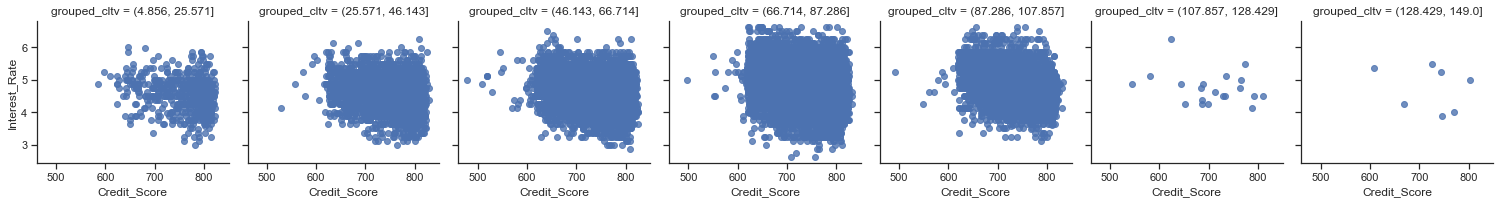

In [27]:
# grouping CLTV into 7 bins 
loans['grouped_cltv'] = pd.cut(loans['CLTV'], 7)

# scatterplot
g = sns.FacetGrid(loans, col='grouped_cltv', margin_titles=True)
g.map(sns.regplot, "Credit_Score", "Interest_Rate", fit_reg=False, x_jitter=.1)

plt.show()

In all the CLTV bins, we notice dense scatterplots on the larger values of Credit Scores, meaning that mortgages were generally given to borrowers with high credit score (>600). There is a high variation in each grouped CLTV across interest rates.

In [28]:
# deleting grouped_cltv column as it was used solely to compare different CLTV brackets in the graph above
loans.drop(columns='grouped_cltv', inplace=True)

#### Loan-To-Value

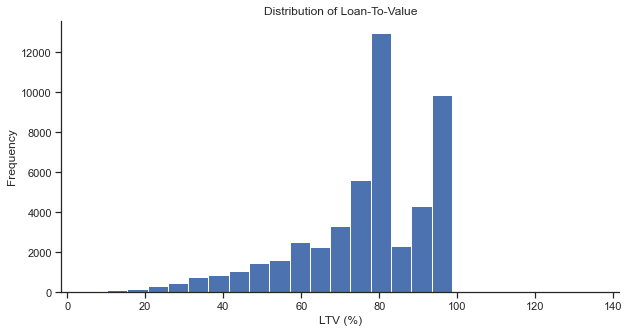

In [29]:
loans['LTV'].plot.hist(bins=25)
plt.title('Distribution of Loan-To-Value')
plt.xlabel('LTV (%)')
plt.show()

In [30]:
loans[['Number_Units', 'LTV']].groupby('Number_Units').describe()

LTV                                                      
                count       mean        std   min    25%   50%   75%    max
Number_Units                                                               
1             48788.0  76.282856  17.135554   5.0  69.00  80.0  90.0  135.0
2               855.0  69.415205  16.249504   8.0  61.50  75.0  75.0  135.0
3               194.0  69.963918  15.261579  13.0  66.25  75.0  75.0  102.0
4               163.0  68.208589  13.994026  17.0  63.50  75.0  75.0   95.0

On average, borrowers requested loans that are 80% of the property value. The distribution is left skewed and bi-modal, since we see another peak at 90-95%. The Loan-To-Value is relatively equally spread among properties with 1,2,3 and 4 units. 

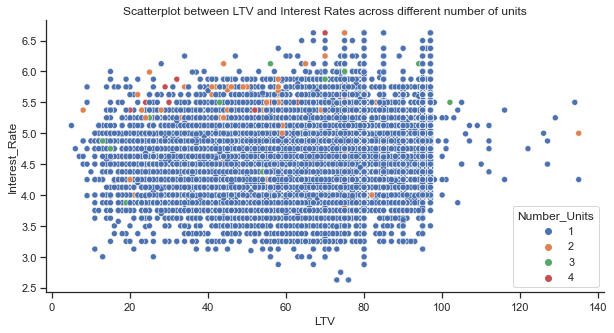

In [31]:
sns.scatterplot(data=loans, x='LTV', y='Interest_Rate', hue='Number_Units', palette="deep")
plt.title('Scatterplot between LTV and Interest Rates across different number of units')

plt.show()

Similarly to CLTV, most of the LTV values are concentrated below 100%. Notice how properties with more than 1 unit tend to have higher interest rates.  

#### Channel

* B - Broker
* C - Correspondent 
* R - Retail

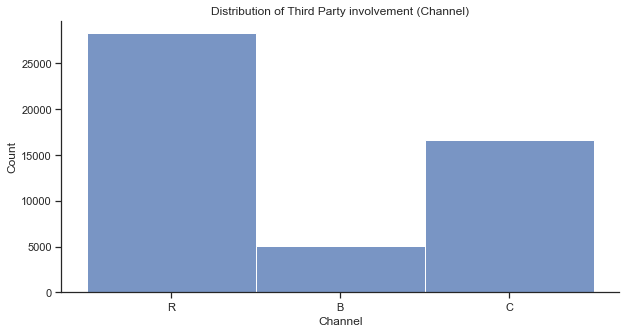

In [32]:
sns.histplot(data=loans, x='Channel')
plt.title('Distribution of Third Party involvement (Channel)')

plt.show()

In [33]:
loans[['Channel', 'Interest_Rate']].groupby('Channel').describe()

Interest_Rate                                                   
                count      mean       std    min   25%   50%  75%    max
Channel                                                                 
B              5059.0  4.747991  0.458162  2.990  4.50  4.75  5.0  6.500
C             16674.0  4.758511  0.466285  2.875  4.50  4.75  5.0  6.625
R             28267.0  4.724480  0.481748  2.625  4.49  4.75  5.0  6.625

Majority of the loans went directly through a lender or its affiliates. Next popular channel of loans were through correspondent (an entity that typically sells the mortgages it originates to other lenders, which are not affiliates of that entity, under
a specific commitment or as part of an ongoing relationship). The mean interest rates for each channel was pretty much the same. 

#### States

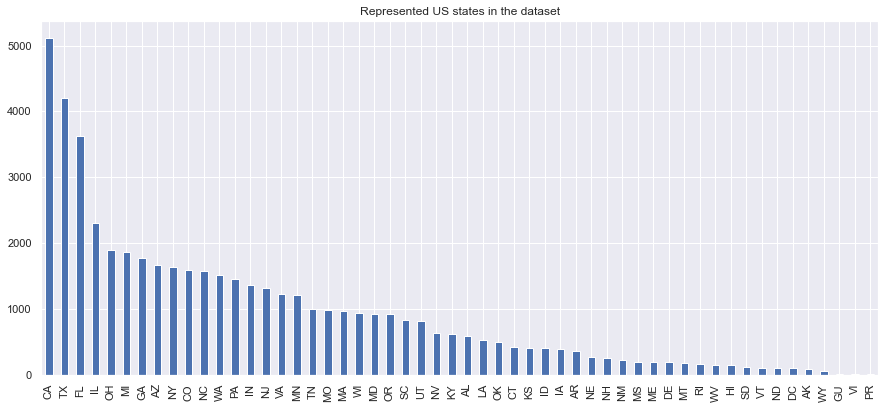

In [34]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')

loans['State'].value_counts().plot(kind='bar')
plt.title('Represented US states in the dataset')

plt.show()

The highest number of loans in the dataset comes from California, while the least numbers belong to Guam, Virgin Islands and Puerto Rico. This is expected, as the number of mortgages depend on the population of the states.  

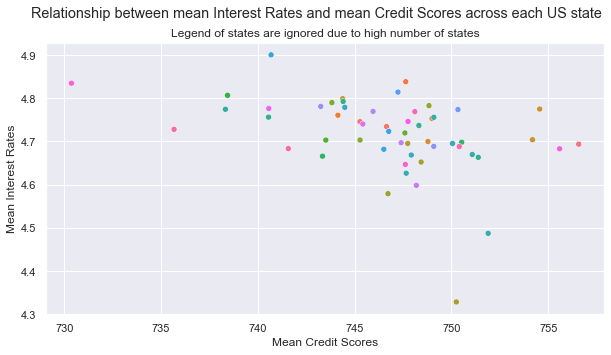

In [35]:
# storing the averages of Credit Scores and Interest Rates of each state
temp_df = loans[['Credit_Score', 'Interest_Rate', 'State']].groupby('State').mean()
temp_df.reset_index(inplace=True)

sns.scatterplot(data=temp_df, x='Credit_Score', y='Interest_Rate', hue='State', legend=None)
plt.suptitle('Relationship between mean Interest Rates and mean Credit Scores across each US state')
plt.title('Legend of states are ignored due to high number of states')
plt.xlabel('Mean Credit Scores')
plt.ylabel('Mean Interest Rates')
plt.show()

When we calculate the averages of credit scores and interest rates of each state, we notice a negative relationship between the two variables: as the average credit score increases, the average interest rates decrease. This is expected, as higher credit scores are seen as less risky, therefore less mortgage fee.

#### Correlations between numerical variables

In [36]:
# corr between numerical vals
num_cols = loans.select_dtypes(['float64', 'int64']).columns
num_cols

Index(['Credit_Score', 'Number_Units', 'CLTV', 'DTI', 'LTV', 'Interest_Rate',
       'Loan_Term', 'Number_Borrowers'],
      dtype='object')

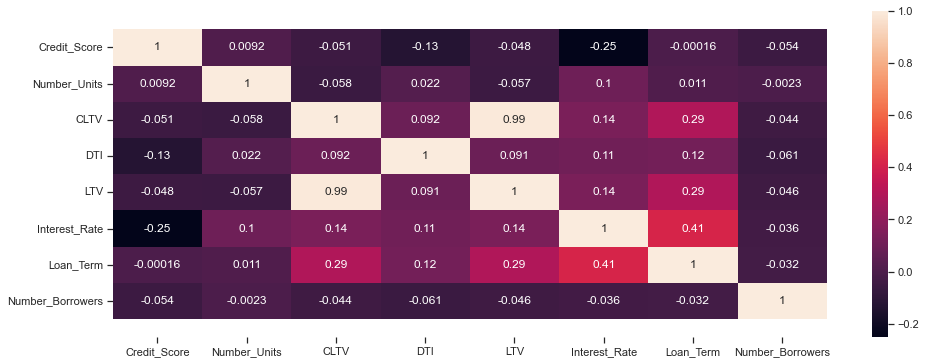

In [37]:
sns.set_theme(style="ticks")
plt.figure(figsize=(16, 6))
df_corr = loans[num_cols].corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

* CLTV and LTV are highly correlated, which is expected. 
* Negative correlation between Credit Score and Interest Rate.
* Positive correlation between Loan Term and Interest Rate. It is reasonable, as lenders, by setting longer loan terms, receive larger overall costs, therefore increase the interest rate. 
* Other variables seem to have weak correlations. 

#### Correlations between categorical variables

To calculate the correlations between categorical varriables, I will be using Theil's U to quantify the relationships. 
The code for Theil's U is taken from [here](https://www.kaggle.com/code/ankursg8/loan-delinquency-prediction/notebook#Drop-irrelevant-columns). 

In [38]:
cat_cols = loans.columns[~loans.columns.isin(num_cols)]
cat_cols

Index(['First_Time_Homebuyer', 'Occupancy_Status', 'Channel', 'State',
       'Property_Type', 'Purpose'],
      dtype='object')

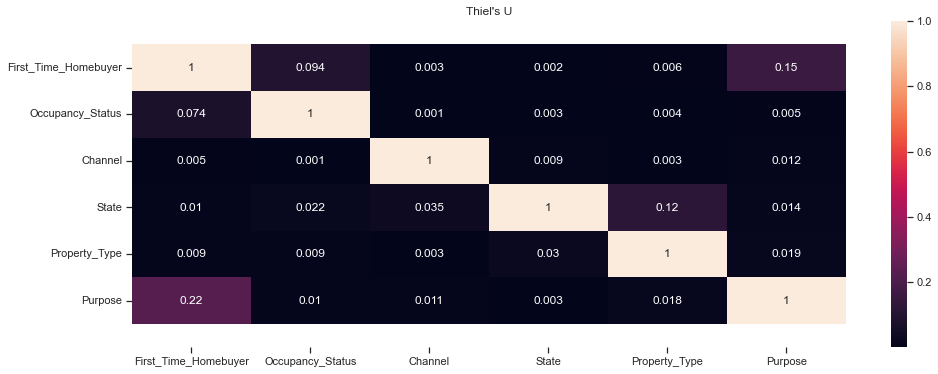

In [39]:
from collections import Counter
import math
from scipy.stats import entropy

def _conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
        
    return entropy

def theil_u(x,y):
    s_xy = _conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x
    
# Calculate Theil's U
cat_corr = {}
for i in cat_cols:
    cat_corr[i] = []
    for j in cat_cols:
        cat_corr[i].append(np.round(theil_u(loans[i], loans[j]), 3))

cat_corr_df = pd.DataFrame(cat_corr, index=cat_cols)

# Thiel's U heatmap
plt.figure(figsize=(16, 6))
plt.title("Thiel's U")
ax = sns.heatmap(cat_corr_df, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.show()

We do not observe any strong correlations between the categorical variables. The highest correlation value is 0.22 between First Time Homebuyer and Purpose. This is somewhat expected, as most of the first time homebuyers get mortgage loans to purchase housing. 

## Modeling

Since we are trying to predict mortgage rates, which is a continuous variable, we will deploy regression models. 
Two models will be deployed:
* Linear Regression: since our target variable is normally distributed, linear regression could be helpful for forecasting.
* K-Neighbors Regression (KNN Regressor)

For KNN regressor, we will also use Cross-Validation and GridSearch to find the best parameters.

Additionally, we will create a baseline model to create a benchmark. Sklearn package provides Dummy Regressor which will serve as a baseline model in our analysis.

**Evaluation**: Root Mean Squared Error (RMSE) and coefficient of determination ($R^2$)
* Since we are working with continuous target variable, our success metric will be root mean squared error. It will show us how close our predicted values are to real values. Also, root mean squared error value has the same units as the target variable, which will make the interpretation easier. The lower RMSE value is, the more accurately the model predicted the mortgage rates.

* We will also look at the coefficient of determination to see how well the variance of target variable is explained by the variances in independent variables in each model. The higher the $R^2$, the better the model fits the data.

### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

X = loans.drop('Interest_Rate', axis=1)
y = loans['Interest_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Preparing the Data

Steps: 
1. Encoding caterogical variables 
2. Scaling numerical variables

In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# converting caterogical variables into numerical

categorical_columns = ["First_Time_Homebuyer", "Occupancy_Status", "Channel", "State", "Property_Type", "Purpose"]
numerical_columns = ['Credit_Score', 'Number_Units', 'CLTV', 'DTI', 'LTV', 'Loan_Term', 'Number_Borrowers']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False)

### Baseline Dummy regressor

In [84]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

dummy_regr = Pipeline([('preprocessor', preprocessor), 
                     ('model', DummyRegressor(strategy="mean"))]) 
dummy_regr.fit(X_train, y_train)

# RMSE for train data
rmse_train_dummy = math.sqrt(mean_squared_error(y_train, dummy_regr.predict(X_train))) 

# RMSE for test data
y_pred_dummy = dummy_regr.predict(X_test)
rmse_test_dummy = math.sqrt(mean_squared_error(y_test, y_pred_dummy))

# R^2 
r_2_dummy = r2_score(y_test, y_pred_dummy)

In [97]:
print(f'Average mortgage interest rate (dummy regression): {np.round(y_pred_dummy[0], 2)}%')

Average mortgage interest rate (dummy regression): 4.74%


### Model 1: Linear Regression

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Linear Regression (intercept included)
LinReg = Pipeline([('preprocessor', preprocessor), 
                     ('model', LinearRegression())])

# fit the data
LinReg.fit(X_train, y_train)

# Evaluation

# RMSE for train data
rmse_train_linreg = math.sqrt(mean_squared_error(y_train, LinReg.predict(X_train))) #RMSE for train data

# RMSE for test data
y_pred_linreg = LinReg.predict(X_test)
rmse_test_linreg = math.sqrt(mean_squared_error(y_test, y_pred_linreg))

# R^2 
r_2_linreg = r2_score(y_test, y_pred_linreg)

### Model 2: KNN Regressor

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn_pipe =  Pipeline([('preprocessor', preprocessor), 
                     ('model', KNeighborsRegressor())])

# parameter grid
knn_pipe_params = {'model__n_neighbors': range(1,20,2)}

# grid search object
knn_grid_pipe = GridSearchCV(knn_pipe, param_grid=knn_pipe_params, cv=5)

# fit the train data
knn_grid_pipe.fit(X_train, y_train)

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_transform(
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\compose\_co

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_transform(
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\compose\_co

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 748, in transform
    Xs = self._fit_transform(
  File "C:\Users\Makhambet\anaconda3\lib\site-packages\sklearn\compose\_co

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['First_Time_Homebuyer',
                                                                          'Occupancy_Status',
                                                                          'Channel',
                                                                          'State',
                                                                          'Property_Type',
                                                                          'Purpose']),
                                                                        ('standardscaler',
                 

In [87]:
# what was the best estimator?
knn_grid_pipe.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['First_Time_Homebuyer',
                                                   'Occupancy_Status',
                                                   'Channel', 'State',
                                                   'Property_Type',
                                                   'Purpose']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Credit_Score',
                                                   'Number_Units', 'CLTV',
                                                   'DTI', 'LTV', 'Loan_Term',
                                                   '

In [88]:
# best knn parameters
knn_grid_pipe.best_params_

{'model__n_neighbors': 1}

Grid Search suggests that n_neighbors = 1 is the best parameter. However, in most cases it leads to overfitting. Therefore, we will compare n_neighbors = 1 to the default parameter n_neighbors = 5 on test data using KNN score and RMSE.

In [89]:
knn_1 =  Pipeline([('preprocessor', preprocessor), 
                     ('model', KNeighborsRegressor(n_neighbors=1))])
knn_1.fit(X_train, y_train)

knn_5 = Pipeline([('preprocessor', preprocessor), 
                     ('model', KNeighborsRegressor(n_neighbors=5))]).fit(X_train, y_train)
knn_5.fit(X_train, y_train)

print(f'KNN neighbors=1 score:{knn_1.score(X_test, y_test)}')
print(f'KNN neighbors=5 score:{knn_5.score(X_test, y_test)}')

KNN neighbors=1 score:-0.1700223717543221
KNN neighbors=5 score:0.2943447069681068


In [90]:
print(f'RMSE KNN neighbors=1: {math.sqrt(mean_squared_error(y_test, knn_1.predict(X_test)))}')
print(f'RMSE KNN neighbors=5: {math.sqrt(mean_squared_error(y_test, knn_5.predict(X_test)))}')

RMSE KNN neighbors=1: 0.5111700152265063
RMSE KNN neighbors=5: 0.39697630893543256


As we can see, KNN neighbors=5 produced better results in both cases: its score is higher and root mean squared error is lower. Therefore, we will proceed with using KNN neighbors=5 regression model.

In [91]:
# Evaluation

# RMSE for train data
rmse_train_knn = math.sqrt(mean_squared_error(y_train, knn_5.predict(X_train)))

# RMSE for test data
y_pred_knn = knn_5.predict(X_test)
rmse_test_knn = math.sqrt(mean_squared_error(y_test, y_pred_knn))

# R^2 
r_2_knn = r2_score(y_test, y_pred_knn)

In [92]:
# Dataframe of evaluation metrics
dummy_metrics = [rmse_train_dummy, rmse_test_dummy, r_2_dummy]
linreg_metrics = [rmse_train_linreg, rmse_test_linreg, r_2_linreg]
knn_metrics = [rmse_train_knn, rmse_test_knn, r_2_knn]

metrics = pd.DataFrame(list(zip(dummy_metrics, linreg_metrics, knn_metrics)),
               columns =['Baseline', 'Linear Regression', 'KNN Regression'],
                index = ['RMSE Train Data', 'RMSE Test Data', 'R^2'])

metrics.round(2)

,Baseline,Linear Regression,KNN Regression
RMSE Train Data,0.48,0.38,0.33
RMSE Test Data,0.47,0.37,0.40
R^2,-0.00,0.38,0.29


### Interpretation of the results

The table with metric values tells us that both Linear Regression and KNN Regression models performed better than the baseline in terms of RMSE and $R^2$.

In both models, RMSE was lower than 0.5, which could be said the models make accurate prediction. With train data, KNN regression's RMSE was lower, meaning that it was more accurate and produced values closer to the true values compared to Linear Regression. However, In test data, Linear Regression outperformed KNN Regression. 

Also, in terms of the coefficient of determination, we see that Linear Regression has higher value than KNN Regression. This means that Linear Regression model fits the mortgage rate data better than KNN Regression. 

Therefore, I would conclude that for this data Linear Regression is more suitable than KNN Regression. However, $R^2$ is still relatively low because the current model is explaining only 38% of the variations in the mortgage rates. Although we also don't want $R^2$ to be close to 1 (which would indicate overfitting), the model needs improvements to fit the data better. 

### Analysis of Feature Importance

For financial lenders, it might be interesting to know which variables have the strongest effect on predicting mortgage rates. To find that out, we will implement feature importance analysis for the linear regression. It is important to remember that the coefficients of the linear model are a conditional association, i.e. they quantify the variation of a the output (the price) when the given feature is varied, keeping all other features constant.  

Source: https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

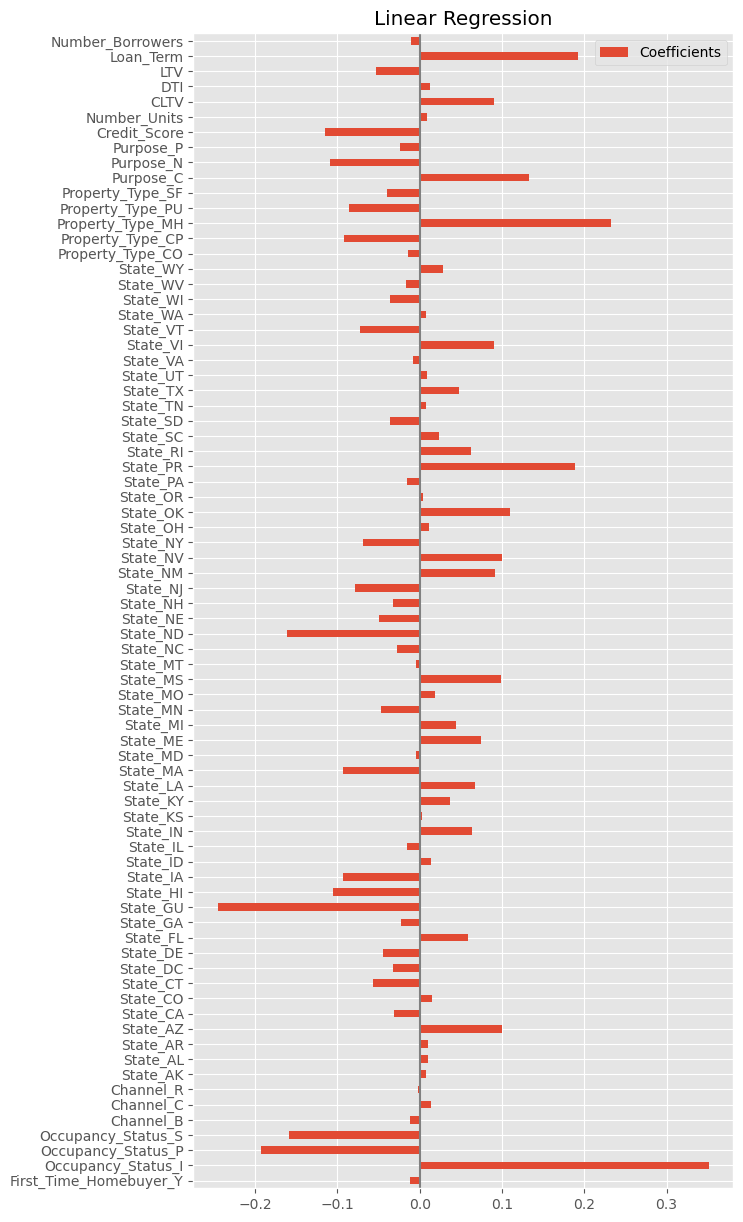

In [117]:
coefs_linreg = pd.DataFrame(
   LinReg.named_steps['model'].coef_,
   columns=['Coefficients'], index=LinReg[:-1].get_feature_names_out()
)

coefs_linreg.plot(kind='barh', figsize=(9, 15))
plt.title('Linear Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In the linear regression model, we see that couple of variables have stronger effect than other variables. Firstly, loan term has relatively strong effect on the prediction of linear regression. The longer the payment term is, higher the mortgage rate will be. Manufactured housing property type also has strong effect on the determination of mortgage rate. It is interesting to note that Manufactured housing is the only housing type that is positively correlated with mortgage rate among all property types. Having Manufactured housing increases the mortgage rate, while other property types actually decrease mortgage rate.

The status of occupancy strongly affects the mortgage rates, given other factors constant. The strongest association is seen with mortgages that are Investment properties, and it is the only positive correlation among all the occupancy status, meaning that investments properties are more likely to increase the mortgage rate, while mortgage properties labelled as primary residence and second home are correlated with lower mortgage rates. 

The plot shows that in terms of the locations of the properties, state Guam, Puerto Rico and North Dakota have strongest effect (in this order) on the mortgage rates. However, this is because there is very low amount of mortgages from these states, therefore the comparison is not valid. 

## Conclusion & Next steps

The prediction of mortgage rates for 2018 was based on the dataset provided by Freddie Mac. The dataset contained only Non-Relief Refinance loans. The prediction was conducted using Linear Regression and KNN Regression models. The result showed that Linear Regression model fits the mortgage rate data better and predicts with lower errors than KNN Regression. 

Feature importance analysis showed that loan terms, manufactured housing properties and occupancy status have the strongest effect on predicting mortgage rates. It was also established that investment property mortgages, on average, have higher mortgage rates than loans meant for residence. 

There are some ways that this project could be improved. First of all, the data contains loans that are not part of relief programs, so our predictive model is not universal - it only focuses on non-relief refinance loans. Also, the dataset captures loans from 2018 only, suggesting that inclusion of other years would be favourable to adjust for the characteristics of each year and control for crises and other factors that could be captured in time series analysis.

Our linear regression model could be subject to omitted variable biases. For instance, we did not control for the factors surrounding the property such as number of schools and hospitals in the area, crime rate and etc. As these factors stronly affect the price, thus the mortgage rate, of properties, inclusion of these data could improve predictive powers of our models. 

Hyperparameter tuning could be improved for the models to find the best parameters for prediction. Besides the models deployed in this research, implementation of more advanced machine learning models like neural networks is suggested. 